In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [29]:
df = pd.read_excel('/Users/spencerfogelman/Downloads/table_8_offenses_known_to_law_enforcement_california_by_city_2013.xls', skiprows=4)

In [30]:
df = df[:-2]

In [31]:
df.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Assault', 'PropertyCrime', 'Burglary', 'Larceny', 'MotorTheft', 'Arson']

In [32]:
df.drop('Rape1', axis=1, inplace=True)

In [33]:
df

,City,Population,ViolentCrime,Murder,Rape2,Robbery,Assault,PropertyCrime,Burglary,Larceny,MotorTheft,Arson
0,Adelanto,31165.0,198.0,2.0,15.0,52.0,129.0,886.0,381.0,372.0,133.0,17.0
1,Agoura Hills,20762.0,19.0,0.0,2.0,10.0,7.0,306.0,109.0,185.0,12.0,7.0
2,Alameda,76206.0,158.0,0.0,10.0,85.0,63.0,1902.0,287.0,1285.0,330.0,17.0
3,Albany,19104.0,29.0,0.0,1.0,24.0,4.0,557.0,94.0,388.0,75.0,7.0
4,Alhambra,84710.0,163.0,1.0,9.0,81.0,72.0,1774.0,344.0,1196.0,234.0,7.0
5,Aliso Viejo,50005.0,25.0,0.0,2.0,4.0,19.0,315.0,71.0,224.0,20.0,3.0
6,Alturas,2681.0,28.0,1.0,4.0,2.0,21.0,71.0,23.0,46.0,2.0,0.0
7,American Canyon,20068.0,54.0,0.0,4.0,31.0,19.0,510.0,91.0,387.0,32.0,2.0
8,Anaheim,345320.0,1130.0,11.0,82.0,437.0,600.0,9611.0,1412.0,6518.0,1681.0,35.0
9,Anderson,10098.0,63.0,0.0,8.0,9.0,46.0,721.0,147.0,454.0,120.0,5.0


In [35]:
df['MurderCat'] = np.where(df['Murder'] == 0, 0, 1)

In [39]:
df.drop('Murder', axis=1, inplace=True)

In [46]:
X = df.loc[:, ~(df.columns).isin(['MurderCat', 'City'])]

In [47]:
y= df['MurderCat']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
#Vanilla Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))
predictions = logreg.predict(X_test)

0.712074303406
0.669064748201


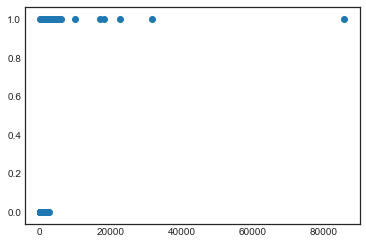

In [60]:
plt.scatter(X_test['PropertyCrime'], y_test)
plt.show()

In [54]:
#Lasso Logistic Regression
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.795665634675
0.776978417266


In [53]:
#Ridge Logistic Regression
logreg = LogisticRegression(penalty = 'l2')
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.712074303406
0.669064748201
